<a href="https://colab.research.google.com/github/henriquesantos769/Rede_de_Varejo/blob/main/Analise_Rede_de_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede de varejo

Este projeto tem como objetivo responder
10 perguntas de negócio a partir de um dataset
sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.
Os dados são reais, e para ter acesso basta  [clicar aqui](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls).


Vamos responder 10 perguntas de negócio com base nos dados:

1) Qual cidade tem a maior venda de produtos na categoria 'Office Supplies'?

2) Qual é o total de vendas por data do pedido? Apresente o resultado em um gráfico de barras.

3) Qual é o total de vendas por estado? Apresente o resultado em um gráfico de barras.

4) Quais são as 10 cidades com maior total de vendas? Apresente o resultado em um gráfico de barras.

5) Qual segmento teve o maior total de vendas? Apresente o resultado em um gráfico de pizza.

6) Qual é o total de vendas por segmento e por ano?

7) Quantas vendas receberiam 15% de desconto, considerando a regra de desconto baseada no valor de venda?

8) Qual seria a média do valor de venda antes e depois de conceder um desconto de 15%?

9) Qual é a média de vendas por segmento, por ano e por mês? Apresente o resultado em um gráfico de linha.

10) Qual é o total de vendas por categoria e subcategoria, considerando apenas as top 12 subcategorias? Apresente o resultado em um único gráfico.

### Importando as Bibliotecas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Análise Exploratória

In [37]:
data_varejo = pd.read_excel('/content/drive/MyDrive/Data Science Academy/Sample - Superstore.xls')


In [38]:
data_varejo.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [39]:
data_varejo.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [40]:
data_varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Visualisando as informações acima, identificamos que o Data frame possui 9994 observações e 21 colunas.

Com a ausência de valores ***Nulos*** e ***Not a Numbers***, podemos partir para as análises, visto que não precisaremos se preucupar com a limpeza dos dados.

In [41]:
data_varejo.shape

(9994, 21)

In [42]:
data_varejo[data_varejo.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [43]:
#Verificanso de o DataFrame possui NA ou valores Nulos
print("Quanntidade de NA (Not a Numbers), no DataFrame",data_varejo.isna().sum())

print("Quanntidade de NULL (Valores Nulos), no DataFrame",data_varejo.isnull().sum())

Quanntidade de NA (Not a Numbers), no DataFrame Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Quanntidade de NULL (Valores Nulos), no DataFrame Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [44]:
#Resumo estatístico da coluna de vendas
data_varejo['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [99]:
#Filtrando os dados com a categoria desejada
cidade_com_maior_valor_p1 = data_varejo[data_varejo['Category'] == 'Office Supplies']

#Agrupando por cidade e calculando o total de valor_da_venda
cidade_com_maior_valor_p1 = cidade_com_maior_valor_p1.groupby('City')['Sales'].sum()
cidade_com_maior_valor_p1 = cidade_com_maior_valor_p1.reset_index()

# Encontrando a cidade com o maior valor de vendas
cidade_com_maior_valor = cidade_com_maior_valor_p1.loc[cidade_com_maior_valor_p1['Sales'].idxmax(), 'City']

print(f"A cidade com maior valor de venda de produtos da categoria Office Supplies é {cidade_com_maior_valor}")


A cidade com maior valor de venda de produtos da categoria Office Supplies é New York City


# Pergunta 2

Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [49]:
data_varejo.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [50]:
data_varejo_p2 = data_varejo.groupby('Ship Date')['Sales'].sum()

data_varejo_p2.head()

Ship Date
2014-01-07      29.228
2014-01-08     307.500
2014-01-10    4374.880
2014-01-12     106.694
2014-01-13      40.544
Name: Sales, dtype: float64

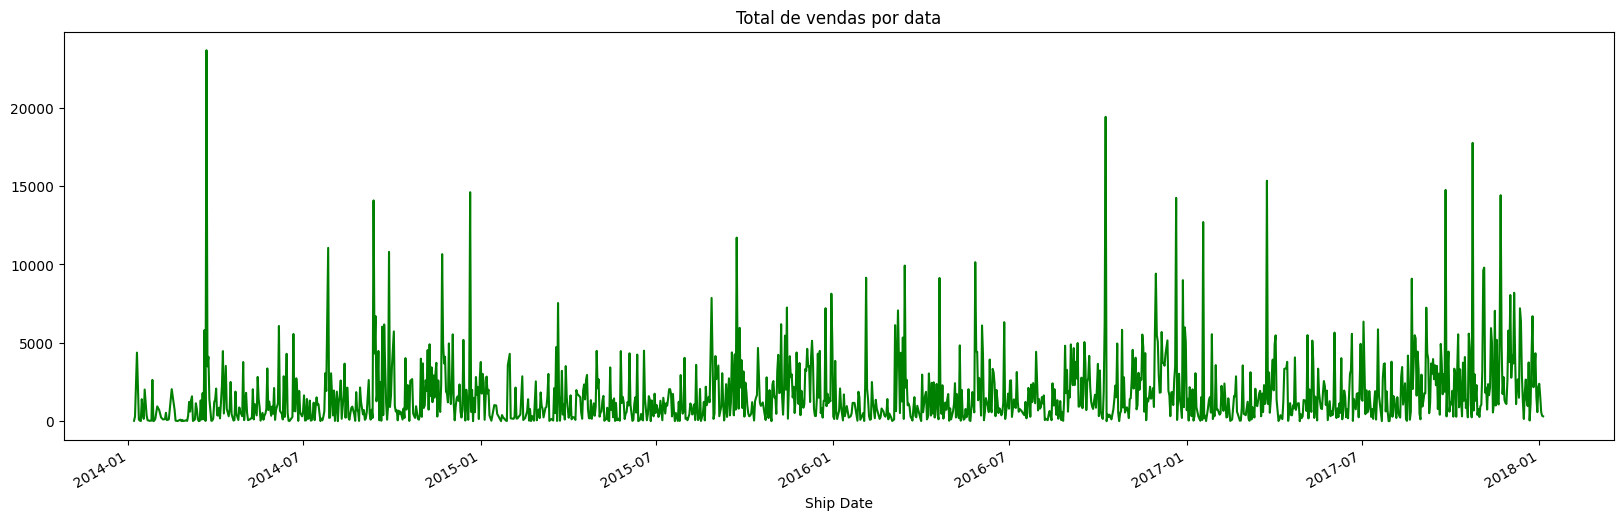

In [51]:
plt.figure(figsize = (20, 6 ))
data_varejo_p2.plot(x = 'Ship Date', y = 'Sales', color = 'green')
plt.title('Total de vendas por data')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [52]:
data_varejo_p3 = data_varejo.groupby('State')['Sales'].sum().reset_index()

In [53]:
data_varejo_p3.head()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180


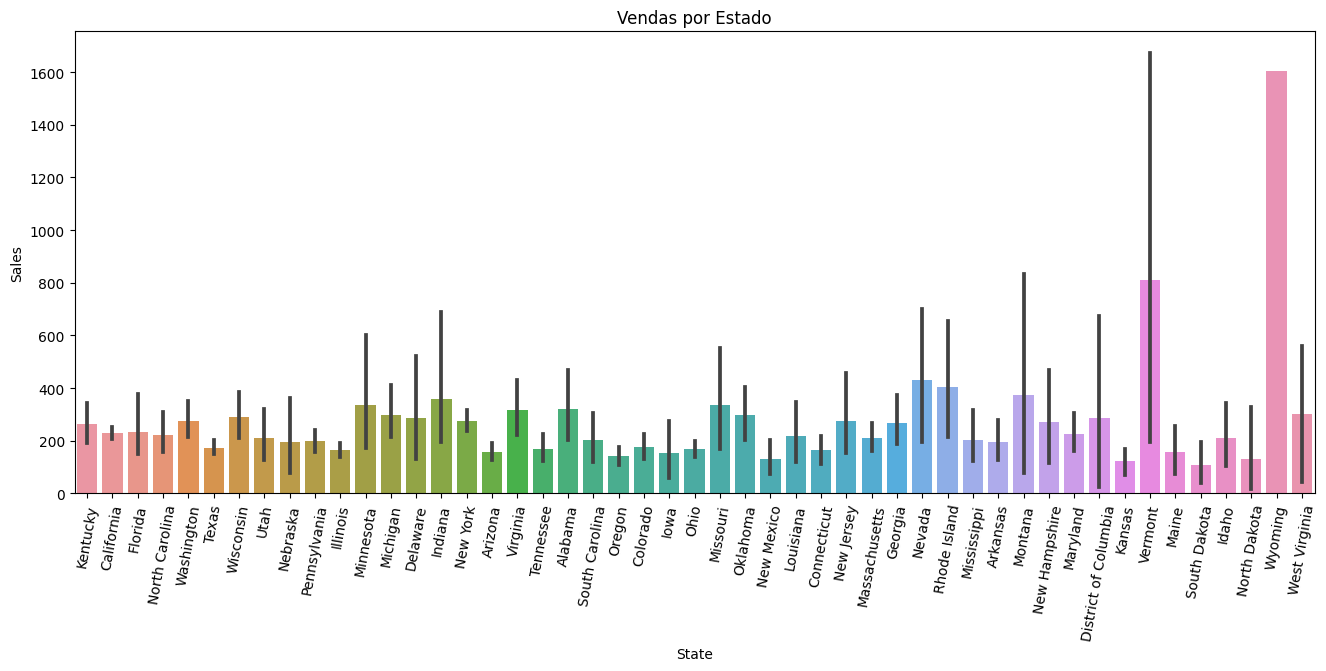

In [54]:
plt.figure(figsize=(16,6))
sns.barplot(data = data_varejo,
            x = 'State',
            y = 'Sales').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [55]:
data_varejo_p4 = data_varejo.groupby('City')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False).head(10)
data_varejo_p4

,City,Sales
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


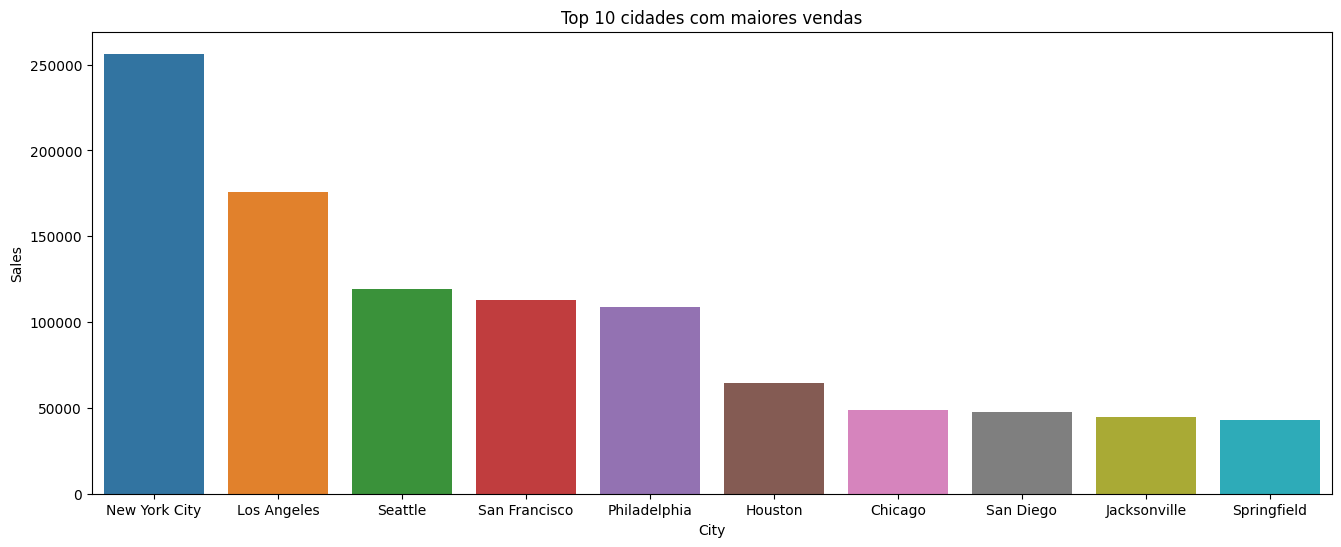

In [56]:
plt.figure(figsize = (16,6))
sns.barplot(data = data_varejo_p4,
            x = 'City',
            y = 'Sales').set(title = 'Top 10 cidades com maiores vendas')

plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [57]:
data_varejo_p5 = data_varejo.groupby('Segment')['Sales'].sum().reset_index().sort_values(by = 'Sales',
                                                                                         ascending = False)

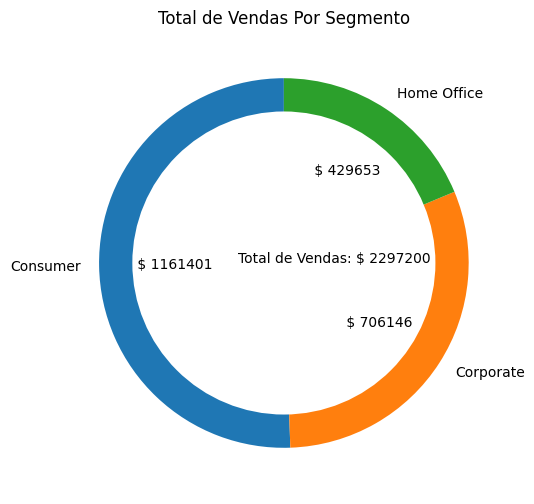

In [58]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(data_varejo_p5['Sales'],
        labels = data_varejo_p5['Segment'],
        autopct = autopct_format(data_varejo_p5['Sales']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(data_varejo_p5['Sales']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()


## Pergunta de Negócio 6:

### Qual o Total de Vendas Por Segmento e Por Ano?

In [59]:
data_varejo['Ship Date'] = pd.to_datetime(data_varejo['Ship Date'], dayfirst = True)
data_varejo.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [60]:
data_varejo['Year'] = data_varejo['Ship Date'].dt.year


In [61]:
data_varejo_p6 = data_varejo.groupby(['Year', 'Segment'])['Sales'].sum()

data_varejo_p6

Year  Segment    
2014  Consumer       263436.4766
      Corporate      120263.0307
      Home Office     86683.6858
2015  Consumer       265223.0893
      Corporate      135960.6899
      Home Office     78258.7228
2016  Consumer       299009.2432
      Corporate      207068.5008
      Home Office    105248.0090
2017  Consumer       330095.9991
      Corporate      241633.4494
      Home Office    159160.2669
2018  Consumer         3636.5368
      Corporate        1220.6960
      Home Office       302.4640
Name: Sales, dtype: float64

## Pergunta de Negócio 7 :

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [62]:
data_varejo['Discount'] = np.where(data_varejo['Sales']>1000, 0.15,0.10)
data_varejo['Discount'].value_counts()

0.10    9526
0.15     468
Name: Discount, dtype: int64

In [63]:
print('No total 468 vendas receberão descontos de 15%')

No total 468 vendas receberão descontos de 15%


## Pergunta de Negócio 8 :

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [65]:
data_varejo['Discount'] = data_varejo['Sales'] - (data_varejo['Sales']*data_varejo['Discount'])

In [66]:
data_varejo['Discount'].head(5)

0    235.76400
1    658.74600
2     13.15800
3    861.81975
4     20.13120
Name: Discount, dtype: float64

In [71]:
#Média dos valores antes do desconto
valores_antes_do_desconto = data_varejo['Sales'].mean()
valores_antes_do_desconto

229.85800083049833

In [72]:
#Média dos valores depois do desconto
Média_de_vendas_depois_doDesconto = data_varejo['Discount'].mean()
Média_de_vendas_depois_doDesconto

201.91838305883533

## Pergunta de Negócio 9 :

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [74]:
data_varejo['Month'] = data_varejo['Ship Date'].dt.month

In [75]:
data_varejo['Month'].head()

0    11
1    11
2     6
3    10
4    10
Name: Month, dtype: int64

In [77]:
data_varejo_p9 = data_varejo.groupby(['Year', 'Month', 'Segment'])['Sales'].agg([np.sum,np.mean,np.median])

In [78]:
data_varejo_p9

sum        mean  median
Year Month Segment                                    
2014 1     Consumer      5966.0530  142.048881  30.636
           Corporate     1701.5280  130.886769  51.940
           Home Office   5607.5500  329.855882  62.820
     2     Consumer      4054.4900  130.790000  36.440
           Corporate     1183.6680   98.639000  73.460
...                            ...         ...     ...
2017 12    Corporate    22603.0130  171.234947  56.064
           Home Office  22863.8710  304.851613  68.472
2018 1     Consumer      3636.5368  134.686548  44.688
           Corporate     1220.6960  110.972364  16.032
           Home Office    302.4640   75.616000  45.342

[147 rows x 3 columns]

In [79]:
years = data_varejo_p9.index.get_level_values(0)
month = data_varejo_p9.index.get_level_values(1)
segment = data_varejo_p9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

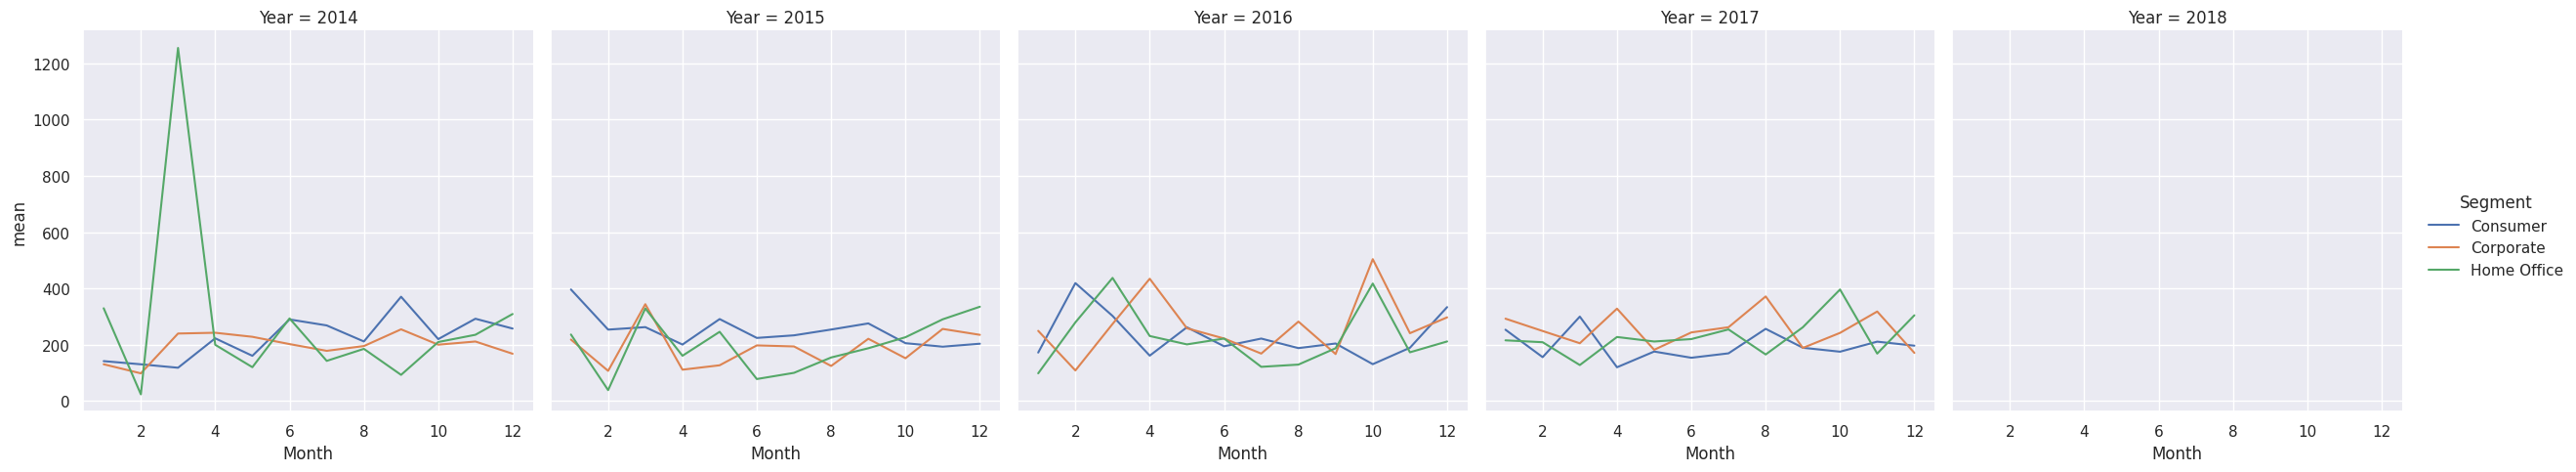

In [84]:
#Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = data_varejo_p9,
                   y = 'mean',
                   x = month,
                   hue = segment,
                   col = years,
                   col_wrap = 5)
plt.show()

## Pergunta de Negócio 10:

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

Demonstre tudo através de um único gráfico.

In [64]:
data_varejo.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')

In [88]:
#Agrupar em categoria e Sub categoria
data_varejo_p10 = data_varejo.groupby(['Category', 'Sub-Category']).sum(numeric_only = True).sort_values('Sales',
                                                                                                                 ascending = False).head(12)

In [89]:
#Converter a coluna de vendas em inteiro  e classificar por categoria
data_varejo_p10 = data_varejo_p10[['Sales']].astype(int).sort_values(by = 'Category').reset_index()


In [90]:
data_varejo_p10

,Category,Sub-Category,Sales
0,Furniture,Chairs,328449
1,Furniture,Tables,206965
2,Furniture,Bookcases,114879
3,Furniture,Furnishings,91705
4,Office Supplies,Storage,223843
5,Office Supplies,Binders,203412
6,Office Supplies,Appliances,107532
7,Office Supplies,Paper,78479
8,Technology,Phones,330007
9,Technology,Machines,189238


In [91]:
data_varejo_p10_df = data_varejo_p10.groupby('Category').sum(numeric_only = True).reset_index()

In [92]:
data_varejo_p10_df

,Category,Sales
0,Furniture,741998
1,Office Supplies,613266
2,Technology,836153


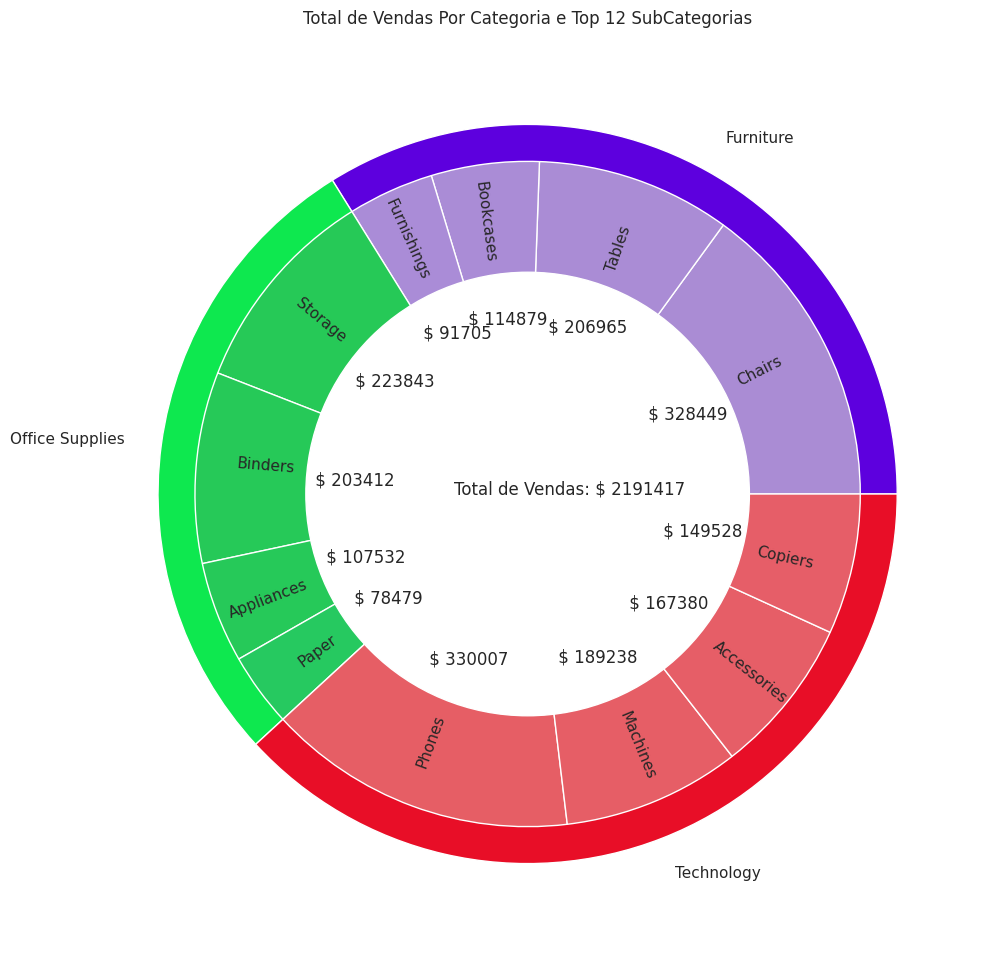

In [93]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']


# Plot
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(data_varejo_p10_df['Sales'],
            radius = 1,
            labels = data_varejo_p10_df['Category'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(data_varejo_p10['Sales'],
            radius = 0.9,
            labels = data_varejo_p10['Sub-Category'],
            autopct = autopct_format(data_varejo_p10['Sales']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Plotagem
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(data_varejo_p10['Sales']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

## Conclusão

Os dados fornecem insights significativos. Ao utilizar a coluna 'Sales' como indicador principal, investigamos os segmentos que geram maior lucro. Manipulamos os dados para realizar análises temporais e categóricas. Além disso, criamos uma visualização para facilitar a compreensão da distribuição desses dados, o que é crucial para a tomada de decisões e para otimizar processos, como a aplicação de descontos nas vendas. Estou satisfeito por ter concluído este projeto.